# Pymaceuticals Inc.

 

Import Libraries and Load Data:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame using the 'Mouse ID' column
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


Identify and Remove Duplicate Data:

In [2]:
# Count the number of unique mice
num_mice = combined_data['Mouse ID'].nunique()

# Print the result
print(f'The number of unique mice: {num_mice}')

The number of unique mice: 249


In [3]:
# Getting the duplicate mice by ID number based on 'Mouse ID' and 'Timepoint'
duplicate_mice = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()

# Displaying the duplicate mice
print(duplicate_mice)

['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 

# Data for the duplicate mouse ID 'g989'
duplicate_data = combined_data[combined_data["Mouse ID"] == "g989"]

# Display data for the duplicate mouse ID
print(duplicate_data)

    Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
860     g989          0           45.000000                 0     Propriva   
861     g989          0           45.000000                 0     Propriva   
862     g989          5           48.786801                 0     Propriva   
863     g989          5           47.570392                 0     Propriva   
864     g989         10           51.745156                 0     Propriva   
865     g989         10           49.880528                 0     Propriva   
866     g989         15           51.325852                 1     Propriva   
867     g989         15           53.442020                 0     Propriva   
868     g989         20           55.326122                 1     Propriva   
869     g989         20           54.657650                 1     Propriva   
870     g989         25           56.045564                 1     Propriva   
871     g989         30           59.082294                 1   

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_dataframe = combined_data[~combined_data['Mouse ID'].isin(duplicate_mice)]
clean_dataframe.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [6]:
# Checking the number of mice in the clean DataFrame.
clean_mice_number = clean_dataframe['Mouse ID'].nunique()
clean_mice_number


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

grouped_data = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)']

mean_tumor_volume = grouped_data.mean()
median_tumor_volume = grouped_data.median()
variance_tumor_volume = grouped_data.var()
std_dev_tumor_volume = grouped_data.std()
sem_tumor_volume = grouped_data.sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statistics_dataframe = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_volume,
    "Median Tumor Volume": median_tumor_volume,
    "Tumor Volume Variance": variance_tumor_volume,
    "Tumor Volume Std. Dev.": std_dev_tumor_volume,
    "Tumor Volume Std. Err.": sem_tumor_volume
}).reset_index()

# Display DataFrame
summary_statistics_dataframe

,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


In [8]:
# Use the aggregation method to calculate summary statistics in a single line
summary_aggregation = clean_dataframe.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(
    columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'}
)
# Display the summary statistics DataFrame
summary_aggregation

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

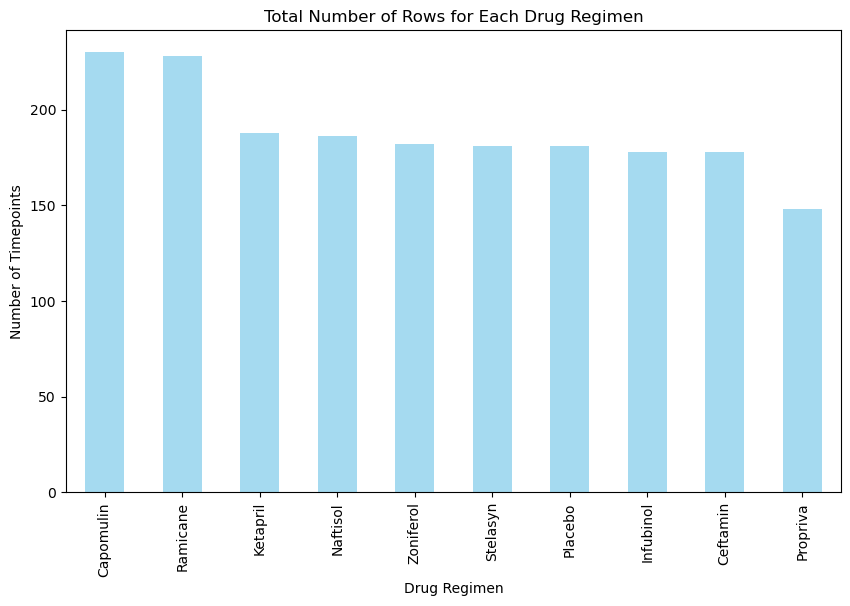

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Group by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = clean_dataframe['Drug Regimen'].value_counts()

# Plot the bar chart using Pandas
regimen_counts.plot(kind='bar', color='skyblue', alpha=0.75, figsize=(10, 6))

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')

# Show the plot
plt.show()

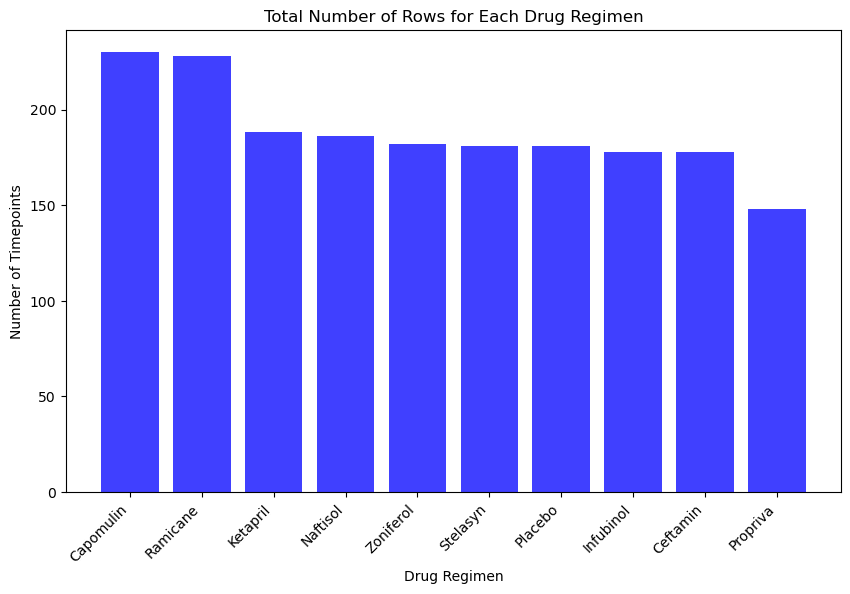

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# Group by 'Drug Regimen' and count the number of rows for each regimen
regimen_counts = clean_dataframe['Drug Regimen'].value_counts()

# Plot the bar chart using pyplot
plt.figure(figsize=(10, 6))
plt.bar(regimen_counts.index, regimen_counts, color='blue', alpha=0.75)

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Timepoints')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

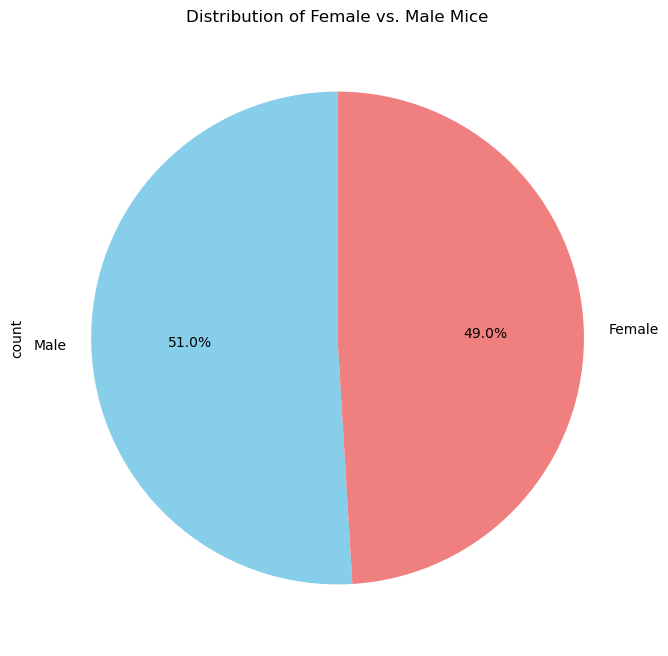

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group by 'Sex' and count the number of mice for each gender
gender_distribution = clean_dataframe['Sex'].value_counts()

# Plot the pie chart using Pandas
gender_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'], figsize=(8, 8))

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Show the plot
plt.show()

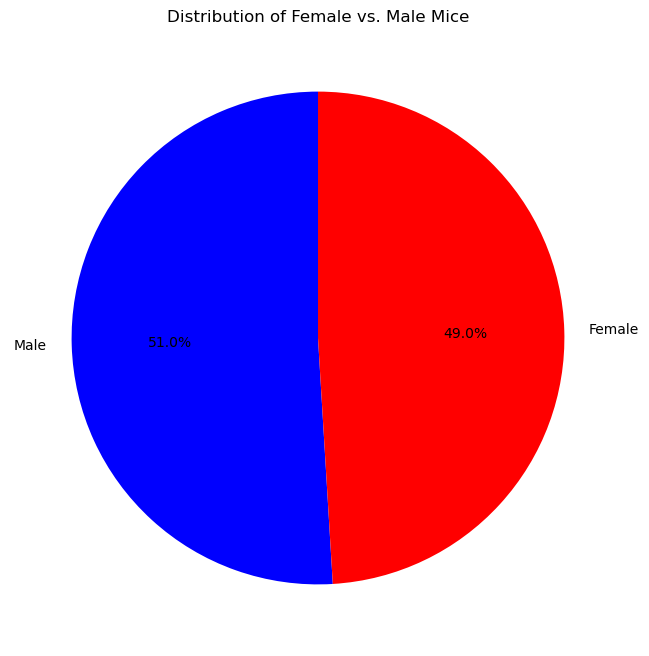

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Group by 'Sex' and count the number of mice for each gender
gender_distribution = clean_dataframe['Sex'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=90, colors=['blue', 'red'])

# Add title
plt.title('Distribution of Female vs. Male Mice')

# Show the plot
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# List of selected treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Filter the data for the selected treatment regimens
selected_treatments_data = clean_dataframe[clean_dataframe['Drug Regimen'].isin(selected_regimens)]

# Find the last timepoint for each mouse
last_timepoints = selected_treatments_data.groupby('Mouse ID')['Timepoint'].max()

# Create a DataFrame with the last timepoints
last_timepoints_df = pd.DataFrame({'Timepoint': last_timepoints}).reset_index()

# Merge with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoints_df, clean_dataframe, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the final tumor volume DataFrame
final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
95,y769,45,68.594745,4,Ceftamin,Female,6,27
96,y793,45,31.896238,2,Capomulin,Male,17,17
97,y865,45,64.729837,3,Ceftamin,Male,23,26
98,z578,45,30.638696,0,Ramicane,Male,11,16


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds


# List of selected treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data for plotting
tumor_volume_data = []

# Loop through each treatment regimen
for regimen in selected_regimens:
    # Filter the data for the current regimen
    regimen_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Append tumor volume data to the list
    tumor_volume_data.append(regimen_data)
    
    # Calculate the IQR for the current regimen
    quartiles = regimen_data.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine upper and lower bounds to identify potential outliers
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    # Identify potential outliers
    outliers = regimen_data[(regimen_data < lower_bound) | (regimen_data > upper_bound)]
    
    # Print results for the current regimen
    print(f"Regimen: {regimen}")
    print(f"IQR: {iqr}")
    print(f"Potential Outliers: {outliers.tolist()}\n")

Regimen: Capomulin
IQR: 7.781863460000004
Potential Outliers: []

Regimen: Ramicane
IQR: 9.098536719999998
Potential Outliers: []

Regimen: Infubinol
IQR: 11.477135160000003
Potential Outliers: [36.3213458]

Regimen: Ceftamin
IQR: 15.577752179999997
Potential Outliers: []



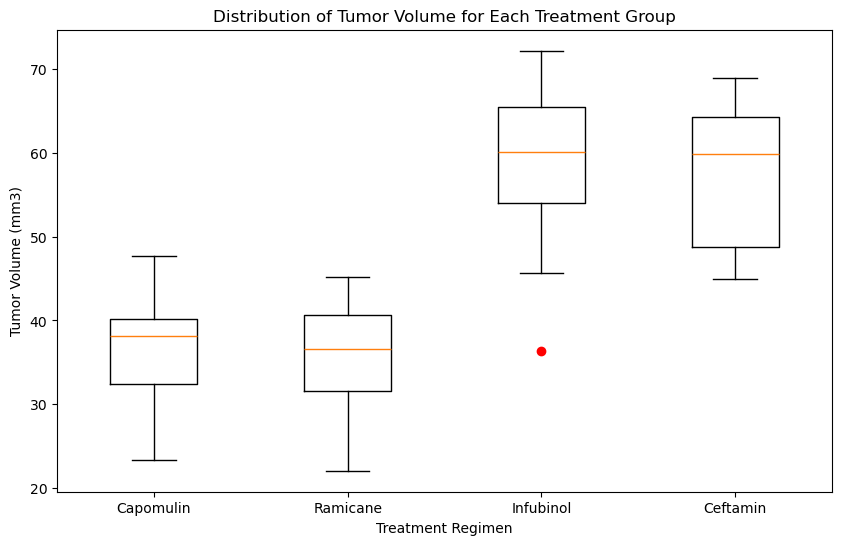

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# List of selected treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create an empty list to fill with tumor volume data for plotting
tumor_volume_data = []

# Loop through each treatment regimen
for regimen in selected_regimens:
    # Filter the data for the current regimen
    regimen_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == regimen]['Tumor Volume (mm3)']
    
    # Append tumor volume data to the list
    tumor_volume_data.append(regimen_data)

# Plot the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_volume_data, labels=selected_regimens, sym='r')

# Add title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Treatment Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.show()

## Line and Scatter Plots

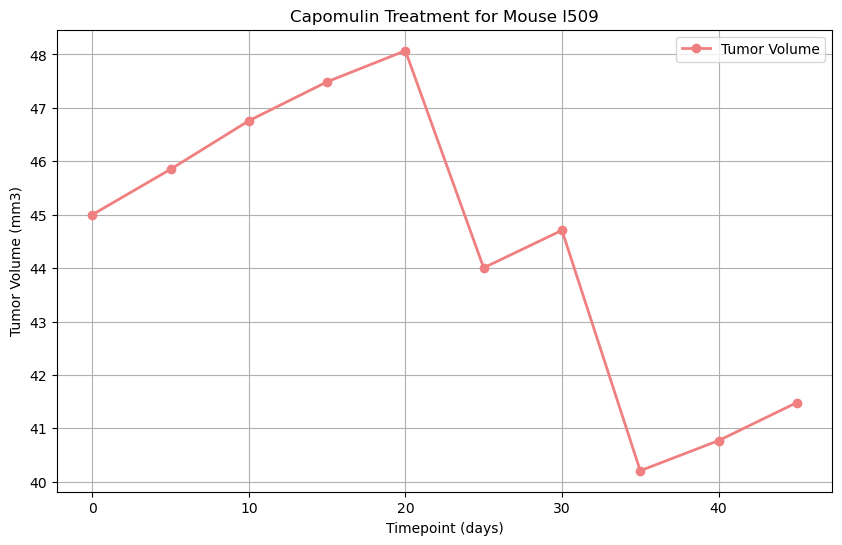

In [16]:
# Filter data for Capomulin regimen and a specific mouse (replace 'l509' with the actual Mouse ID)
capomulin_mouse_data = clean_dataframe[(clean_dataframe['Drug Regimen'] == 'Capomulin') & (clean_dataframe['Mouse ID'] == 'l509')]

# Check if the selected mouse data is not empty
if not capomulin_mouse_data.empty:
    # Plot the line chart
    plt.figure(figsize=(10, 6))
    plt.plot(capomulin_mouse_data['Timepoint'], capomulin_mouse_data['Tumor Volume (mm3)'], linewidth=2, color="lightcoral", marker='o', label="Tumor Volume")

    # Add title and labels
    plt.title(f'Capomulin Treatment for Mouse l509')
    plt.xlabel('Timepoint (days)')
    plt.ylabel('Tumor Volume (mm3)')
    
    # Add a legend
    plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show()
else:
    print("No data found for the specified mouse in the Capomulin regimen.")

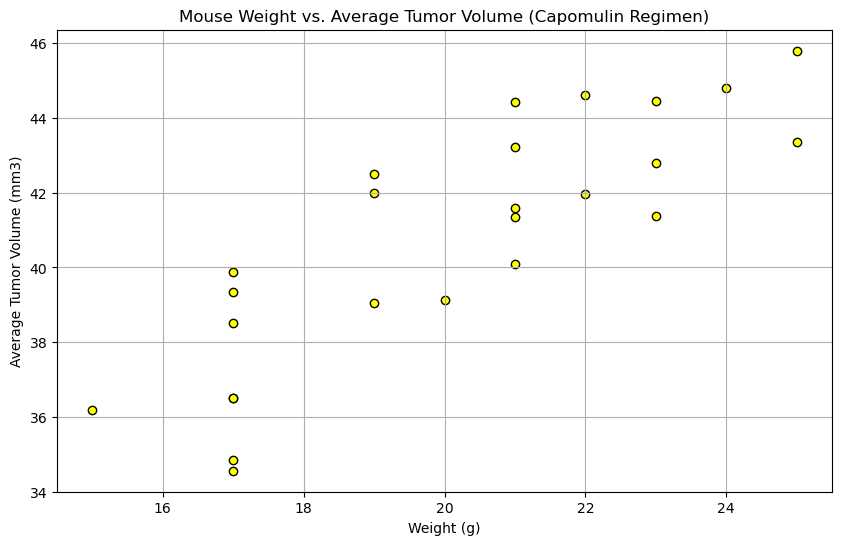

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Filter data for the Capomulin regimen
capomulin_data = clean_dataframe[clean_dataframe['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge with mouse metadata to get the weight information
merged_data = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID', how='inner')

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='yellow', edgecolors='black')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.show()

## Correlation and Regression

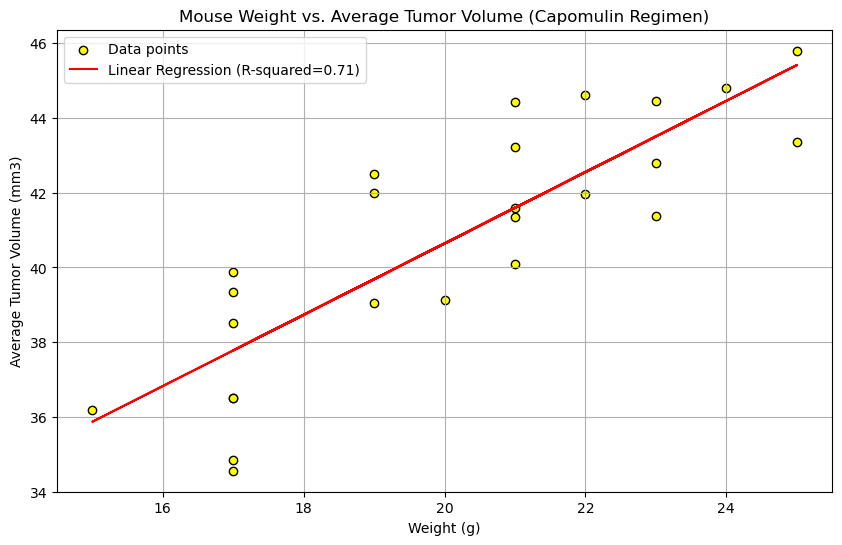

Correlation Coefficient: 0.84


In [18]:
from scipy.stats import linregress

# Filter data for the Capomulin regimen
capomulin_data = clean_dataframe[clean_dataframe['Drug Regimen'] == 'Capomulin']

# Calculate the average observed tumor volume for each mouse
avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge with mouse metadata to get the weight information
merged_data = pd.merge(avg_tumor_volume, mouse_metadata, on='Mouse ID', how='inner')

# Calculate the correlation coefficient
correlation_coefficient = merged_data['Weight (g)'].corr(merged_data['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Generate predicted values
fit_line = slope * merged_data['Weight (g)'] + intercept

# Plot the scatter plot and regression line
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='yellow', edgecolors='black', label='Data points')
plt.plot(merged_data['Weight (g)'], fit_line, color='red', label=f'Linear Regression (R-squared={r_value**2:.2f})')

# Add title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

# Display
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')

## Analysis

This repository provides an analysis of tumor response in mice to various medication regimens based on data from Pymaceuticals Inc.'s preclinical studies.

- Data Cleaning: The dataset initially involved 249 unique mice, but one mouse ('g989') was identified with duplicate timepoints, leading to unreliable data. This mouse was excluded from further analysis. After cleaning, the study included data from 248 mice.
  
- Summary Statistics: Capomulin and Ramicane showed lower mean tumor volumes compared to other regimens, indicating potential efficacy.
  
- Bar Charts and Pie Charts: Bar charts were generated to visualize the total number of timepoints for each drug regimen. Capomulin and Ramicane had more data points than other treatments. Additionally, pie charts illustrated the distribution of female versus male mice in the study, showing a nearly equal split between genders.
  
- Quartiles, Outliers, and Box Plots: The final tumor volumes for mice treated with Capomulin, Ramicane, Infubinol, and Ceftamin were analyzed for potential outliers. No outliers were found for Capomulin and Ramicane, while Infubinol had one potential outlier. Ceftamin had no outliers. A box plot visually depicted the distribution of final tumor volumes for each treatment, highlighting any potential outliers.
  
- Line Plot and Scatter Plot: A line plot showcased the tumor volume changes over time for a specific mouse ('l509') treated with Capomulin. A scatter plot depicted the relationship between mouse weight and average tumor volume for the Capomulin regimen. The plot suggested a positive correlation between weight and tumor volume.
  
- Correlation and Regression: The correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen was 0.84, indicating a strong positive correlation. A linear regression model was fitted to the data, showing a positive trend between weight and tumor volume.

## Conclusion
- The analysis suggests that Capomulin and Ramicane may be more effective in reducing tumor volume compared to other treatments. Additionally, there is a notable positive correlation between mouse weight and average tumor volume for mice treated with Capomulin, indicating that heavier mice tend to have larger tumor volumes. These findings provide valuable insights for further investigation and potential improvements in treatment strategies.